In [1]:
import re

import pandas as pd
import numpy as np
from scipy.io import loadmat

In [2]:
data = loadmat('../data/AR.mat')
data = {k: v for k, v in data.items() if re.sub('(fc_)|(\d+$)', '', k) not in ['downsta', '__header__', '__globals__', '__version__']}
print(data.__repr__()[:2048], '...')

{'fc_cycling1': array([[array([[-1.4556746 , -0.8810662 ,  9.308656  ],
       [-2.1068974 ,  1.3024457 , 10.228029  ],
       [-0.15322891,  3.217807  , 10.113108  ],
       [-1.8004396 ,  1.0342951 ,  8.121132  ],
       [-0.        ,  1.8770541 ,  9.308656  ],
       [-0.7661445 ,  0.45968673,  9.002198  ],
       [-0.34476504, -0.6512228 ,  9.844957  ],
       [-1.685518  , -0.34476504, 11.147403  ],
       [-2.2218192 ,  0.45968673,  9.921572  ],
       [-0.        ,  0.30645782,  8.274361  ],
       [ 0.7278373 ,  0.30645782, 10.036493  ],
       [-2.0685902 ,  0.7278373 ,  8.925584  ],
       [-0.30645782,  0.95768064,  9.270349  ],
       [-1.6089035 ,  1.2258313 ,  8.504205  ],
       [-3.4859576 , -0.5746084 ,  9.078813  ],
       [-5.592855  ,  0.80445176,  8.00621   ],
       [-6.397307  ,  0.2681506 ,  8.810662  ],
       [-5.861006  , -0.61291564,  9.155427  ],
       [-7.469909  , -2.0685902 ,  9.040505  ],
       [-7.623138  ,  1.8770541 ,  8.695741  ],
       [-4.40533

In [3]:
print('Maxtrixes per experiment')
for key, values in data.items():
    print(f'{key}: {values.shape[1]}')

Maxtrixes per experiment
fc_cycling1: 82
fc_cycling10: 105
fc_cycling11: 85
fc_cycling12: 93
fc_cycling13: 173
fc_cycling14: 163
fc_cycling15: 158
fc_cycling16: 165
fc_cycling17: 145
fc_cycling2: 65
fc_cycling3: 66
fc_cycling4: 67
fc_cycling5: 63
fc_cycling6: 24
fc_cycling7: 42
fc_cycling8: 33
fc_cycling9: 36
fc_downstairs18: 31
fc_downstairs19: 31
fc_downstairs20: 24
fc_downstairs21: 25
fc_downstairs22: 29
fc_downstairs23: 28
fc_downstairs24: 23
fc_downstairs25: 27
fc_downstairs26: 28
fc_downstairs27: 29
fc_downstairs28: 28
fc_downstairs29: 30
fc_downstairs30: 22
fc_downstairs31: 13
fc_downstairs32: 20
fc_downstairs33: 13
fc_downstairs34: 20
fc_downstairs35: 20
fc_downstairs36: 20
fc_downstairs37: 20
fc_downstairs38: 20
fc_downstairs39: 20
fc_downstairs40: 20
fc_downstairs41: 18
fc_downstairs42: 19
fc_downstairs43: 2
fc_downstairs44: 9
fc_downstairs45: 9
fc_downstairs46: 10
fc_downstairs47: 10
fc_downstairs48: 10
fc_downstairs49: 10
fc_downstairs50: 9
fc_downstairs51: 10
fc_downstairs

In [4]:
len(data)

242

In [5]:
shapes = {}
for key, values in data.items():
    for m in values[0]:
        if m.shape[0] in shapes:
            shapes[m.shape[0]] += 1
        else:
            shapes[m.shape[0]] = 1

print('Matrixes size: count')
dict(sorted(shapes.items(), key=lambda x: x[0]))

Matrixes size: count


{39: 1,
 44: 2,
 46: 1,
 51: 2,
 52: 2,
 53: 1,
 54: 1,
 55: 2,
 57: 1,
 58: 3,
 59: 1,
 60: 3,
 61: 7,
 62: 23,
 63: 86,
 64: 342,
 65: 1279,
 66: 4806,
 67: 6017,
 68: 7,
 69: 1,
 73: 1,
 88: 1}

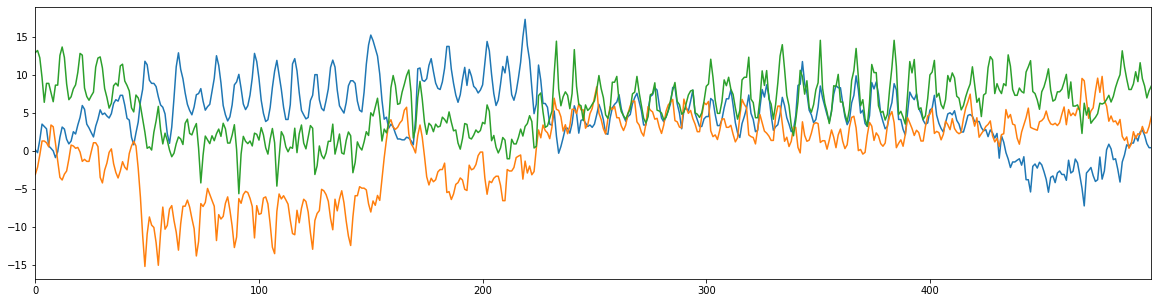

In [6]:
%matplotlib inline
line = None
for m in data['fc_walking233'][0]:
    if line is None:
        line = m
    else:
        line = np.concatenate((line, m))
        
_ = pd.DataFrame(line, columns=['x', 'y', 'z']).iloc[:500].plot(figsize=(20, 5), legend=False)

In [7]:
df = pd.concat([pd.DataFrame(v.tolist(), index=[k]) for k, v in data.items()])
s = df.stack(level=0)
df = s.groupby(level=[0,1]).apply(lambda x: pd.DataFrame(x[0], columns=['x', 'y', 'z']))
df.index.names = ['key', 'sample', 'frame']

df = df.reset_index()

df['class'] = df['key'].str.replace('(fc_)|(\d+$)', '')
df['experiment'] = df['key'].str.replace('[a-zA-Z_]', '').astype(int)

df = df.set_index(['class', 'experiment', 'sample', 'frame'])
df = df.drop(columns=['key'])


df = df \
    .unstack(level=3) \
    .groupby(level=0) \
    .apply(lambda g: g \
       .reset_index() \
       .set_index('experiment', append=True) \
       .drop(columns=['class', 'sample'])
    ) \


df.index.levels[1].name = 'sample'

df

c:\users\dkibe\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


x                                   \
frame                             0          1          2          3    
class   sample experiment                                               
cycling 0      1           -1.455675  -2.106897  -0.153229  -1.800440   
        1      1           -7.776367  -8.236053  -6.282385  -7.086837   
        2      1          -10.687717  -9.078813  -7.584831  -8.504205   
        3      1           -6.550536  -5.937620  -6.052542 -12.641385   
        4      1           -9.308656 -10.994174  -7.967903  -3.102885   
        5      1           -8.695741 -11.990162 -10.113108 -10.113108   
        6      1           -5.746084  -3.485958  -4.903325  -8.389282   
        7      1          -10.687717  -9.423577  -9.806650  -9.576807   
        8      1          -11.377246  -6.665457  -4.520253  -4.826711   
        9      1          -10.496181  -9.959879  -8.657433  -7.125144   
        10     1           -7.431602  -3.792415  -4.558560  -7.316680   
        11     1           -9.730036  -9.193734  -7.623138  -9.538500   
        12     1           -5.784391  -7.661445 -12.220005 -10.304644   
        13     1           -8.044517  -4.405331  -4.175488  -7.163451   
        14     1           -9.193734  -7.431602  -8.734048  -9.921572   
        15     1           -4.941632  -8.389282  -5.094861 -10.457872   
        16     1           -7.623138  -8.006210 -10.036493  -8.197746   
        17     1           -7.125144  -6.090849 -10.228029  -9.959879   
        18     1           -8.734048  -8.082825  -8.580819  -6.665457   
        19     1           -6.971915  -6.780379  -7.086837 -11.300631   
        20     1           -8.695741  -8.044517  -8.236053  -8.810662   
        21     1           -9.040505  -4.405331  -4.711789  -8.006210   
        22     1           -5.746084  -6.512228 -10.879252  -8.465897   
        23     1           -7.967903  -6.818687  -8.542512 -10.457872   
        24     1           -3.485958  -7.201758  -6.512228  -5.784391   
        25     1           -9.959879 -10.113108  -8.044517  -7.469909   
        26     1           -4.673482  -5.861006  -7.125144  -4.979940   
        27     1          -10.649409  -8.197746  -7.546524  -8.504205   
        28     1           -3.294421  -4.252102  -7.852982  -6.397307   
        29     1           -9.768343  -8.887277  -7.086837  -8.121132   
...                              ...        ...        ...        ...   
walking 2488   242          1.723825   4.788404   2.643199  -3.715801   
        2489   242          1.110910   3.064578   2.298433   2.068590   
        2490   242         -2.796428   3.639187  -0.536301  -2.106897   
        2491   242          4.596867   3.294421  -0.459687  -7.891289   
        2492   242          2.145205   5.018247   1.915361   3.830723   
        2493   242          2.528277   2.068590   1.800440  -0.881066   
        2494   242         -0.727837   2.336741   4.481946  -0.076614   
        2495   242         -2.681506  -2.681506  -1.800440   0.038307   
        2496   242          2.451662   3.256114   1.647211  -0.459687   
        2497   242         -3.141193  -1.762132   1.877054   2.528277   
        2498   242         -4.826711  -1.264139   8.236053  -3.256114   
        2499   242          2.106897   1.570596   1.379060   1.877054   
        2500   242         -1.838747   2.298433   2.145205  -0.076614   
        2501   242          0.727837  -2.643199   2.681506   1.877054   
        2502   242         -2.260126   2.106897   2.566584  -0.459687   
        2503   242         -3.524265   4.443638  -0.804452   5.363012   
        2504   242          2.030283   1.723825  -1.340753   2.106897   
        2505   242         -1.493982   1.110910  -2.681506  -1.187524   
        2506   242         -5.784391   2.796428   2.681506  -3.945644   
        2507   242          0.919373   2.145205   1.991976  -1.800440   
        2508   242         -2.336741  -3.217807  -0.804452   2.987964   
        2509   242  

In [8]:
df.stack(level='frame').to_csv('../data/data.csv')

In [9]:
df60 = df \
    .stack(level=0) \
    .iloc[:, :60] \
    .dropna() \
    .unstack(level=3) \
    .groupby(level=0) \
    .apply(lambda g: g \
       .reset_index() \
       .set_index('experiment', append=True) \
       .drop(columns=['class', 'sample'])
    ) \

df60.index.levels[1].name = 'sample'
df60

frame                             0                               1   \
                                   x          y         z          x   
class   sample experiment                                              
cycling 0      1           -1.455675  -0.881066  9.308656  -2.106897   
        1      1           -7.776367   0.574608  5.861006  -8.236053   
        2      1          -10.687717   4.443638  4.137180  -9.078813   
        3      1           -6.550536  -2.834735  2.987964  -5.937620   
        4      1           -9.308656   4.903325  3.217807 -10.994174   
        5      1           -8.695741   4.826711  2.528277 -11.990162   
        6      1           -5.746084   0.191536  2.375048  -3.485958   
        7      1          -10.687717   5.822699  3.869030  -9.423577   
        8      1          -11.377246   3.409343  3.562572  -6.665457   
        9      1          -10.496181   6.090849  3.447650  -9.959879   
        10     1           -7.431602   3.026271  2.796428  -3.792415   
        11     1           -9.730036   6.473921  1.953669  -9.193734   
        12     1           -5.784391   2.643199  1.647211  -7.661445   
        13     1           -8.044517   4.252102  2.911349  -4.405331   
        14     1           -9.193734   5.746084  1.838747  -7.431602   
        15     1           -4.941632  -0.919373  2.873042  -8.389282   
        16     1           -7.623138   5.592855  1.685518  -8.006210   
        17     1           -7.125144   1.953669  1.762132  -6.090849   
        18     1           -8.734048   6.090849  1.225831  -8.082825   
        19     1           -6.971915  -0.191536  1.800440  -6.780379   
        20     1           -8.695741   6.780379  0.727837  -8.044517   
        21     1           -9.040505   4.673482  2.719813  -4.405331   
        22     1           -5.746084   2.336741  1.417367  -6.512228   
        23     1           -7.967903   6.512228  0.076614  -6.818687   
        24     1           -3.485958  -0.574608  2.719813  -7.201758   
        25     1           -9.959879   6.282385  0.995988 -10.113108   
        26     1           -4.673482   0.612916  1.493982  -5.861006   
        27     1          -10.649409   7.086837  0.727837  -8.197746   
        28     1           -3.294421   0.536301  1.532289  -4.252102   
        29     1           -9.768343   6.512228  0.536301  -8.887277   
...                              ...        ...       ...        ...   
walking 2484   242          1.723825 -14.135366  1.379060   4.788404   
        2485   242          1.110910  -8.963891  1.110910   3.064578   
        2486   242         -2.796428  -3.715801  2.375048   3.639187   
        2487   242          4.596867 -15.169662  3.294421   3.294421   
        2488   242          2.145205 -11.607090  1.838747   5.018247   
        2489   242          2.528277  -7.546524  8.389282   2.068590   
        2490   242         -0.727837 -12.986150 -3.371036   2.336741   
        2491   242         -2.681506 -11.530476 -3.256114  -2.681506   
        2492   242          2.451662 -14.326902  3.945644   3.256114   
        2493   242         -3.141193  -6.320692  2.604891  -1.762132   
        2494   242         -4.826711 -10.955867  1.915361  -1.264139   
        2495   242          2.106897  -9.232041 -1.417367   1.570596   
        2496   242         -1.838747  -4.788404  1.953669   2.298433   
        2497   242          0.727837 -16.165650 -0.766145  -2.643199   
        2498   242         -2.260126  -6.627150  3.524265   2.106897   
        2499   242         -3.524265  -6.856994  0.727837   4.443638   
        2500   242          2.030283  -9.385270 -0.804452   1.723825   
        2501   242         -1.493982  -6.129156 -4.290410   1.110910   
        2502   242         -5.784391  -9.308656 -0.459687   2.796428   
        2503   242          0.919373 -11.185710 -1.379060   2.145205   
        2504   242         -2.336741 -11.453860  1.723825  -3.217807   
        2505   242          0.766145 -14

In [10]:
df60.stack(level='frame').to_csv('../data/data60.csv')